In [17]:
% matplotlib inline
import pandas as pd

used_cars = pd.read_csv('../DAT18NYC/data/used_vehicles.csv')
used_cars.head()
print used_cars.type.unique()

types = pd.get_dummies(used_cars.type)
print types.head()

used_wtype = used_cars.join(types)
used_wtype.head()

['car' 'truck']
   car  truck
0    1      0
1    1      0
2    1      0
3    1      0
4    1      0


,price,year,miles,doors,type,car,truck
0,22000,2012,13000,2,car,1,0
1,14000,2010,30000,2,car,1,0
2,13000,2010,73500,4,car,1,0
3,9500,2009,78000,4,car,1,0
4,9000,2007,47000,4,car,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F35D2E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021809908>]], dtype=object)

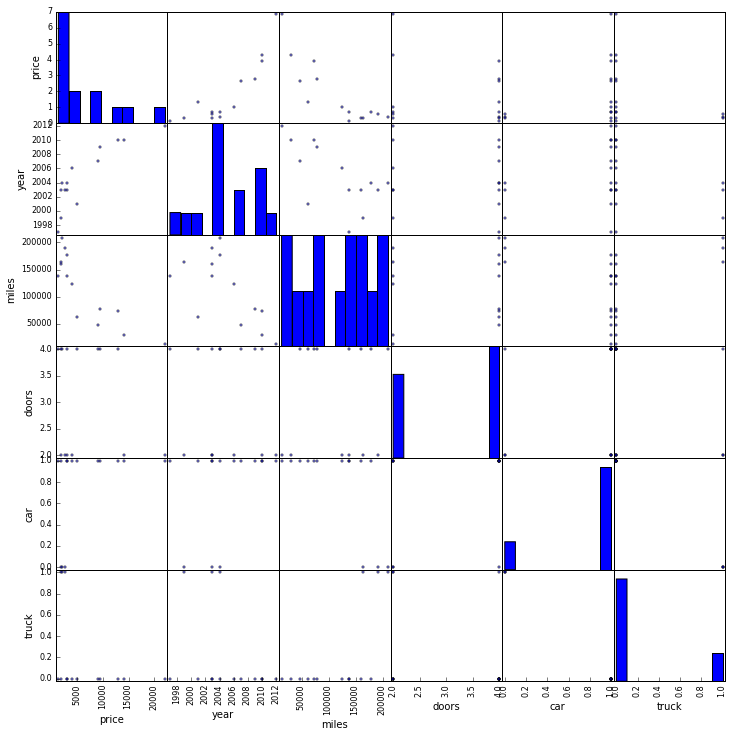

In [19]:
pd.scatter_matrix(used_wtype, figsize=(12,12))

In [24]:
# note: while it's considered common to import pandas as pd and matplotlib with plt,
# i'm unaware of a "best practice" for sklearn modules.
from sklearn import feature_selection as f_select
from sklearn import linear_model as lm
from sklearn import cross_validation as cv
from sklearn import metrics

x_columns = ('year', 'miles', 'doors', 'car', 'truck')
y_column = 'price'

significant_columns = []
pvals = []
for feature in x_columns:
    pval = f_select.f_regression(used_wtype[[feature]], used_wtype[y_column])
    if pval[1][0] < 0.05:
        significant_columns.append(feature)
        pvals.append(pval[1][0])

x_train, x_test, y_train, y_test = cv.train_test_split(used_wtype[significant_columns],
                                                           used_wtype[y_column],
                                                           test_size=0.333,
                                                           random_state=1234)

model = lm.LinearRegression().fit(x_train, y_train)

print pd.DataFrame({
    'column': significant_columns,
    'coef': model.coef_,
    'p-value': pvals,
}).set_index('column')
print
print model.score(x_train, y_train)
print metrics.r2_score(y_train, model.predict(x_train))
print
print model.score(x_test, y_test)
print metrics.r2_score(y_test, model.predict(x_test))

               coef   p-value
column                       
year    1142.860747  0.000087
miles     -0.025300  0.000135

0.952926251496
0.952926251496

0.6570428621
0.6570428621


In [36]:
print used_wtype.price.mean()
print used_wtype.groupby(used_wtype.year).price.mean()

6571.42857143
year
1997     1300.000000
1999     1800.000000
2001     5000.000000
2003     2466.666667
2004     2500.000000
2006     4000.000000
2007     9000.000000
2009     9500.000000
2010    13500.000000
2012    22000.000000
Name: price, dtype: float64


In [38]:
above_mean = used_wtype[used_wtype.price >= used_wtype.price.mean()]
below_mean = used_wtype[used_wtype.price < used_wtype.price.mean()]

In [46]:
print 'above mean price:', above_mean.price.mean()
print above_mean.groupby(above_mean.miles).price.mean()

print 'below mean price:', below_mean.price.mean()
print below_mean.groupby(below_mean.miles).price.mean()

above mean price: 13500.0
miles
13000    22000
30000    14000
47000     9000
73500    13000
78000     9500
Name: price, dtype: int64
below mean price: 2722.22222222
miles
62000     5000
124000    4000
138000    2150
160000    1900
163000    1800
177000    3000
190000    2500
209000    2000
Name: price, dtype: int64


In [47]:
above_above = above_mean[above_mean.price >= above_mean.price.mean()]
above_below = above_mean[above_mean.price < above_mean.price.mean()]
below_above = below_mean[below_mean.price >= below_mean.price.mean()]
below_below = below_mean[below_mean.price < below_mean.price.mean()]

In [50]:
print above_above.price.mean()
print above_below.price.mean()
print below_above.price.mean()
print below_below.price.mean()

18000.0
10500.0
3750.0
1900.0


In [52]:
## BUILDING A TREE IN SKLEARN

# import pandas
import pandas as pd

# read in vehicle data
vehicles = pd.read_csv('../DAT18NYC/data/used_vehicles.csv')

# print out data
vehicles.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [53]:
## .map converts car to 0 and truck to 1
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

In [54]:
## select feature columns (every column except for the 0th column)
feature_cols = vehicles.columns[1:]

## define X (features) and y (response)
X = vehicles[feature_cols]
y = vehicles.price

In [55]:
# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
# print out each of the arrays
print X_train
print y_train
print X_test
print y_test

[[  2003 190000      2      1]
 [  2007  47000      4      0]
 [  2010  30000      2      0]
 [  1999 163000      2      1]
 [  2012  13000      2      0]
 [  1997 138000      4      0]
 [  2003 160000      4      0]
 [  2003 138000      2      0]
 [  2001  62000      4      0]
 [  2006 124000      2      0]]
[ 2500  9000 14000  1800 22000  1300  1900  3000  5000  4000]
[[  2009  78000      4      0]
 [  2004 209000      4      1]
 [  2004 177000      4      0]
 [  2010  73500      4      0]]
[ 9500  2000  3000 13000]


In [58]:
## import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           random_state=1, splitter='best')

In [59]:
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print preds
print y_test

[ 5000.  1900.  1900.  5000.]
[ 9500  2000  3000 13000]


In [60]:
# print RMSE
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(y_test, preds))

4622.4993239588475

In [61]:
# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4804.3767888427128

In [62]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4592.1554255755254

In [63]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4704.0052694797387

In [64]:
# max_depth=3 was best, so fit a tree using that parameter with ALL DATA
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=3,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=1, min_samples_split=2, random_state=1,
           splitter='best')

Best score: 4592.15542558
Best depth: 3


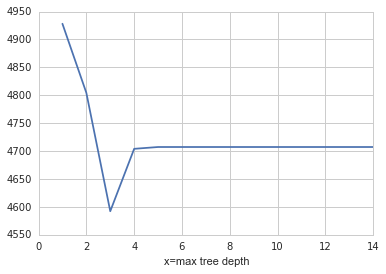

In [72]:
## programmatically find best depth

% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1 ## start with -1 so score will always be better
best_depth = 0

for i in range(1, 15):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(1, 15), all_scores)
plt.xlabel('x=max tree depth')

Best score: 4460.29074243
Best sample split: 5


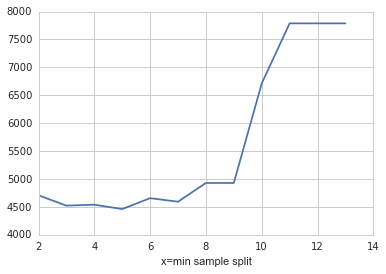

In [73]:
## programmatically find min sample split

% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1 ## start with -1 so score will always be better
best_split = 0

for i in range(2, len(y)):
    treereg = DecisionTreeRegressor(min_samples_split=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_split = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best sample split: %s" % best_split

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_split, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(2, len(y)), all_scores)
plt.xlabel('x=min sample split')

Best score: 4607.62855534
Best leaf: 3


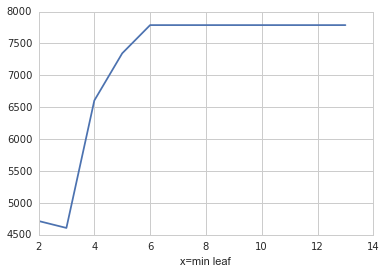

In [76]:
## programmatically find min sample split

% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1 ## start with -1 so score will always be better
best_leaf = 0

for i in range(2, len(y)):
    treereg = DecisionTreeRegressor(min_samples_leaf=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_leaf = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best leaf: %s" % best_leaf

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_leaf, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(2, len(y)), all_scores)
plt.xlabel('x=min leaf')

In [78]:
## compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,type,0.000000


In [81]:
# read in out-of-sample data
oos = pd.read_csv('../DAT18NYC/data/used_vehicles_oos.csv')

# convert car to 0 and truck to 1
oos['type'] = oos.type.map({'car':0, 'truck':1})

# print data
oos

,price,year,miles,doors,type
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [87]:
# now actually fit the model
treereg = DecisionTreeRegressor(min_samples_split=best_split, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=5,
           random_state=1, splitter='best')

In [114]:
# define X and y
X_oos = oos[feature_cols]
y_oos = oos.price

In [89]:
# make predictions on out-of-sample data
preds = treereg.predict(X_oos)

# print predictions and actual values
print preds
print y_oos.values

[  4500.   4500.  11375.]
[ 3000  6000 12000]


In [92]:
# print RMSE
np.sqrt(metrics.mean_squared_error(y_oos, preds))

1276.7961205037134

In [107]:
## TITANITC DATA

# read in the data
titanic = pd.read_csv('../DAT18NYC/data/titanic.csv')
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [109]:
# copy
titanic_c = pd.DataFrame(titanic)

# encode sex feature
titanic_c['sex'] = titanic.sex.map({'female':0, 'male':1})

# fill in missing values for age
titanic_c.age.fillna(titanic.age.mean().round(), inplace=True)

# print the updated DataFrame
titanic_c.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [110]:
# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic_c.embarked, prefix='embarked').iloc[:, 1:]

# join the two dummy variable columns onto the original DataFrame
titanic_c = titanic_c.join(embarked_dummies)

# print the updated DataFrame
titanic_c.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [115]:
# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# define X and y
X = titanic_c[feature_cols]
y = titanic_c.survived

Best score: 0.853689323491
Best samples: 19


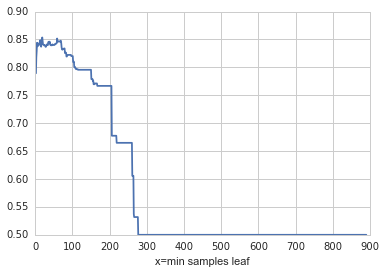

In [129]:
% matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1 ## start with -1 so score will always be better

best_samples = 0
for i in range(2, len(y)):
    treereg = DecisionTreeClassifier(min_samples_leaf=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='roc_auc')    
    current_score = np.mean(scores)
    if current_score > best_score:
        best_score = current_score
        best_samples = i
    all_scores.append(current_score)    

print "Best score: %s" % best_score
print "Best samples: %s" % best_samples

# now actually fit the model
treereg = DecisionTreeClassifier(min_samples_leaf=best_leaf, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(2, len(y)), all_scores)
plt.xlabel('x=min samples leaf')

Best score: 0.835346563129
Best depth: 3


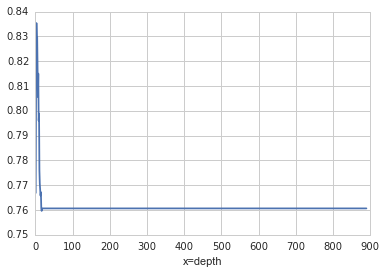

In [134]:
all_scores = []
best_score = -1 ## start with -1 so score will always be better

best_depth = 0
for i in range(1, len(y)):
    treereg = DecisionTreeClassifier(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='roc_auc')    
    current_score = np.mean(scores)
    if current_score > best_score:
        best_score = current_score
        best_depth = i
    all_scores.append(current_score)    

print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(1, len(y)), all_scores)
plt.xlabel('x=depth')